In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import statistics

1000
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

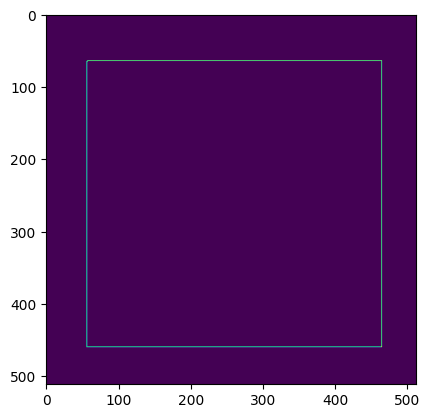

In [6]:
ImgBefore = cv.imread("./SRC3.bmp")
GrayImg = cv.cvtColor(ImgBefore, cv.COLOR_BGR2GRAY)
(thr, Img) = cv.threshold(GrayImg, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)
Imerode = cv.erode(Img, kernel)
Img = Img - Imerode

plt.imshow(Img)

def getStartPos(Image):
    for i in range(Image.shape[0]):
        for j in range(Image.shape[1]):
            getVal = Image[i,j]
            if(0 < getVal):
                startPosition = (i, j)
                return startPosition
            
directions = [ 5,  6,  7,
               4,      0,
               3,  2,  1]

dir2idx = dict(zip(directions, range(len(directions))))

change_j =   [-1,  0,  1,
              -1,      1,
              -1,  0,  1]

change_i =   [-1, -1, -1,
               0,      0,
               1,  1,  1]

start_point = getStartPos(Img)
curr_point = start_point
border = []
chain = []

for direction in directions:
    idx = dir2idx[direction]
    new_point = (start_point[0]+change_i[idx], start_point[1]+change_j[idx])
    if Img[new_point] != 0: # if is ROI
        border.append(new_point)
        chain.append(direction)
        curr_point = new_point
        break

count = 0
while curr_point != start_point:
    b_direction = (direction + 5) % 8 
    dirs_1 = range(b_direction, 8)
    dirs_2 = range(0, b_direction)
    dirs = []
    dirs.extend(dirs_1)
    dirs.extend(dirs_2)
    for direction in dirs:
        idx = dir2idx[direction]
        new_point = (curr_point[0]+change_i[idx], curr_point[1]+change_j[idx])
        if Img[new_point] != 0: # if is ROI
            border.append(new_point)
            chain.append(direction)
            curr_point = new_point
            break
    if count == 1000: break
    count += 1

print(count)
print(chain)

straight_lines = [0, 2, 4, 6]
straight_count = 0
curve_count = 0

for l in chain:
    if l in straight_lines:
        straight_count += 1
    else:
        curve_count += 1

print(straight_count)
print(curve_count)